In [879]:
# 25-07-25, Friday;
# IMDB movies analysis.
import pandas as pd
import numpy as np

### Problem statement:
<!-- We're using directors and movies csv files from Code. -->


In [880]:
# Importing movies.csv:
movies = pd.read_csv(r"C:\Data Analytics Json\Python\Code\movies.csv")

In [881]:
movies.head()

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [882]:
# remove Unnamed: 0
movies.drop("Unnamed: 0", axis = 1, inplace = True)
movies.head()

,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [883]:
movies.shape

(1465, 11)

In [884]:
# checking for duplicates.
movies["id"].nunique()

1465

In [885]:
movies["director_id"].nunique()

199

In [886]:
# Importing directors.csv:
directors = pd.read_csv(r"C:\Data Analytics Json\Python\Code\directors.csv")
directors.head()

,Unnamed: 0,director_name,id,gender
0,0,James Cameron,4762,Male
1,1,Gore Verbinski,4763,Male
2,2,Sam Mendes,4764,Male
3,3,Christopher Nolan,4765,Male
4,4,Andrew Stanton,4766,Male


In [887]:
# remove Unnamed: 0
directors.drop("Unnamed: 0", axis = 1, inplace = True)

In [888]:
directors.head()

,director_name,id,gender
0,James Cameron,4762,Male
1,Gore Verbinski,4763,Male
2,Sam Mendes,4764,Male
3,Christopher Nolan,4765,Male
4,Andrew Stanton,4766,Male


In [889]:
directors["id"].nunique()

2349

In [890]:
np.all((movies["director_id"].isin(directors["id"])))

np.True_

In [891]:
# final df:
df = movies.merge(directors, how = "left", left_on = "director_id", right_on = "id")

In [892]:
df.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,Gore Verbinski,4763,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,Sam Mendes,4764,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,Christopher Nolan,4765,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,Sam Raimi,4767,Male


In [893]:
df.drop(["director_id", "id_y"], axis = 1, inplace = True)

In [894]:
df.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


In [895]:
df.rename({"id_x" : "movie_id"}, axis = 1, inplace = True)

In [896]:
df.head()

,movie_id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


In [897]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1465 non-null   int64  
 1   budget         1465 non-null   int64  
 2   popularity     1465 non-null   int64  
 3   revenue        1465 non-null   int64  
 4   title          1465 non-null   object 
 5   vote_average   1465 non-null   float64
 6   vote_count     1465 non-null   int64  
 7   year           1465 non-null   int64  
 8   month          1465 non-null   object 
 9   day            1465 non-null   object 
 10  director_name  1465 non-null   object 
 11  gender         1341 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 137.5+ KB


In [898]:
df.describe()

,movie_id,budget,popularity,revenue,vote_average,vote_count,year
count,1465.000000,1.465000e+03,1465.000000,1.465000e+03,1465.000000,1465.000000,1465.000000
mean,45225.191126,4.802295e+07,30.855973,1.432539e+08,6.368191,1146.396587,2002.615017
std,1189.096396,4.935541e+07,34.845214,2.064918e+08,0.818033,1578.077438,8.680141
min,43597.000000,0.000000e+00,0.000000,0.000000e+00,3.000000,1.000000,1976.000000
25%,44236.000000,1.400000e+07,11.000000,1.738013e+07,5.900000,216.000000,1998.000000
50%,45022.000000,3.300000e+07,23.000000,7.578164e+07,6.400000,571.000000,2004.000000
75%,45990.000000,6.600000e+07,41.000000,1.792469e+08,6.900000,1387.000000,2009.000000
max,48395.000000,3.800000e+08,724.000000,2.787965e+09,8.300000,13752.000000,2016.000000


In [899]:
df[df["revenue"] == 0]

,movie_id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
271,44050,0,25,0,The Pink Panther,5.6,550,2006,Jan,Wednesday,Shawn Levy,Male
314,44133,75000000,13,0,Anna and the King,6.4,197,1999,Dec,Thursday,Andy Tennant,Male
341,44181,0,13,0,Wolf,6.0,216,1994,Jun,Friday,Mike Nichols,Male
351,44198,0,9,0,Rollerball,3.4,106,2002,Feb,Friday,John McTiernan,NaN
374,44245,65000000,19,0,Mona Lisa Smile,6.5,393,2003,Dec,Friday,Mike Newell,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1453,48294,0,6,0,She's Gotta Have It,6.1,25,1986,Aug,Friday,Spike Lee,Male
1457,48323,0,5,0,The Mighty,7.1,51,1998,Oct,Friday,Peter Chelsom,Male
1459,48359,0,2,0,George Washington,6.4,36,2000,Oct,Sunday,David Gordon Green,Male
1462,48375,0,7,0,Rampage,6.0,131,2009,Aug,Friday,Uwe Boll,Male


In [900]:
df.describe(include = "object")

,title,month,day,director_name,gender
count,1465,1465,1465,1465,1341
unique,1465,12,7,199,2
top,El Mariachi,Dec,Friday,Steven Spielberg,Male
freq,1,193,654,26,1309


In [901]:
df["director_name"].value_counts().head(10)

director_name
Steven Spielberg     26
Martin Scorsese      19
Clint Eastwood       19
Woody Allen          18
Spike Lee            16
Robert Rodriguez     16
Ridley Scott         16
Renny Harlin         15
Steven Soderbergh    15
Tim Burton           14
Name: count, dtype: int64

In [902]:
df["director_name"].value_counts().tail(10)

director_name
Stephen Daldry         5
Gavin O'Connor         5
Mira Nair              5
Sidney Lumet           5
Miguel Arteta          5
Mike Leigh             5
Brad Anderson          5
Michael Polish         5
Darren Lynn Bousman    5
Nicole Holofcener      5
Name: count, dtype: int64

In [903]:
df["revenue"] = (df["revenue"]/ 1000000).round(2)
df["budget"] = (df["budget"]/ 1000000).round(2)

In [904]:
df.head()

,movie_id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237.0,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300.0,139,961.00,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245.0,107,880.67,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250.0,112,1084.94,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258.0,115,890.87,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


In [905]:
df["profit_margin"] = df["revenue"] - df["budget"]
df["prft_mrgn_per"] = (df["profit_margin"]) / df["revenue"] * 100
df.head()

,movie_id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit_margin,prft_mrgn_per
0,43597,237.0,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male,2550.97,91.499191
1,43598,300.0,139,961.00,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male,661.00,68.782518
2,43599,245.0,107,880.67,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male,635.67,72.180272
3,43600,250.0,112,1084.94,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male,834.94,76.957251
4,43602,258.0,115,890.87,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male,632.87,71.039546


In [906]:
df = df[~(df["revenue"] == 0) | (df["budget"] == 0)] # ~ negation.

In [907]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1375 entries, 0 to 1464
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1375 non-null   int64  
 1   budget         1375 non-null   float64
 2   popularity     1375 non-null   int64  
 3   revenue        1375 non-null   float64
 4   title          1375 non-null   object 
 5   vote_average   1375 non-null   float64
 6   vote_count     1375 non-null   int64  
 7   year           1375 non-null   int64  
 8   month          1375 non-null   object 
 9   day            1375 non-null   object 
 10  director_name  1375 non-null   object 
 11  gender         1261 non-null   object 
 12  profit_margin  1375 non-null   float64
 13  prft_mrgn_per  1269 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 161.1+ KB


In [908]:
# 28-07-25, Monday;
df.describe().round(2)

,movie_id,budget,popularity,revenue,vote_average,vote_count,year,profit_margin,prft_mrgn_per
count,1375.00,1375.00,1375.00,1375.00,1375.00,1375.00,1375.00,1375.00,1269.00
mean,45185.96,49.43,32.13,152.63,6.39,1207.09,2002.75,103.20,-72.49
std,1183.83,50.35,35.54,209.76,0.81,1609.40,8.64,177.85,2826.07
min,43597.00,0.00,0.00,0.00,3.00,1.00,1976.00,-165.71,-99900.00
25%,44184.50,15.00,12.00,25.79,5.90,252.00,1998.00,0.84,25.69
50%,44975.00,35.00,24.00,88.92,6.40,632.00,2004.00,47.09,62.55
75%,45932.50,70.00,42.00,187.43,7.00,1476.50,2009.00,132.70,79.00
max,48395.00,380.00,724.00,2787.97,8.30,13752.00,2016.00,2550.97,100.00


In [909]:
df_prft_bdgt_ltst = df[(df["budget"] <= 100) & (df["profit_margin"] > 0) & (df["year"] >= 2010)]
df_prft_bdgt_ltst.describe()

,movie_id,budget,popularity,revenue,vote_average,vote_count,year,profit_margin,prft_mrgn_per
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,45168.225490,38.160441,36.764706,121.551324,6.313725,1374.343137,2012.392157,83.390882,62.291375
std,942.401036,26.313501,24.316135,93.604147,0.767767,1381.609784,1.855132,79.841374,23.837294
min,43881.000000,0.000000,1.000000,0.320000,4.100000,22.000000,2010.000000,0.050000,0.083264
25%,44415.750000,19.950000,20.000000,55.142500,5.700000,526.000000,2011.000000,23.722500,47.104924
50%,45014.000000,31.500000,33.000000,97.075000,6.300000,951.000000,2012.000000,64.120000,66.709447
75%,45710.250000,55.000000,45.000000,165.915000,6.900000,1654.500000,2014.000000,120.992500,79.314271
max,48274.000000,100.000000,143.000000,543.510000,8.000000,10099.000000,2016.000000,483.510000,100.000000


In [910]:
df_prft_bdgt_ltst["director_name"].value_counts().head(15)

director_name
Dennis Dugan          4
Steven Soderbergh     4
David O. Russell      4
Clint Eastwood        4
Jaume Collet-Serra    4
Nicholas Stoller      4
Tim Story             4
Paul W.S. Anderson    3
David Fincher         3
Steven Spielberg      3
Antoine Fuqua         3
Frank Coraci          3
Adam McKay            3
Andrew Niccol         3
Andy Fickman          3
Name: count, dtype: int64

In [911]:
(df_prft_bdgt_ltst[(df_prft_bdgt_ltst["vote_average"] >=6)
                   &
                   (df_prft_bdgt_ltst["prft_mrgn_per"] >= 50)])["director_name"].value_counts().head(15)

director_name
Tim Story             4
David Fincher         3
Steven Spielberg      3
Steven Soderbergh     3
David O. Russell      3
James Wan             3
Jaume Collet-Serra    3
Antoine Fuqua         3
John Madden           3
Lasse Hallström       3
David Ayer            2
Dennis Dugan          2
Todd Phillips         2
Quentin Tarantino     2
Clint Eastwood        2
Name: count, dtype: int64

In [912]:
# Above, we have a list of best directors for the dataset who are profitable, have a good rating, movies done recently and who are a bit budget friendly.

In [913]:
df_prft_bdgt_ltst[["revenue", "budget"]].sum()

revenue    24796.47
budget      7784.73
dtype: float64

In [914]:
# regular function:
def even_odd(num):
    if num % 2 == 0:
        return "Even"
    else:
        return "Odd"
even_odd(4)

'Even'

In [915]:
# single liner/ lambda function:
even_odd = lambda num: "Even" if num % 2 == 0 else "Odd"
even_odd(5)

'Odd'

In [916]:
def profit_margin(row):
    rev = row["revenue"]
    bud = row["budget"]
    if rev == 0:
        return 0 #Avoiding 0 division.
    else:
        return (rev - bud)/ rev

In [917]:
df_prft_bdgt_ltst["prft_mrgn2"] = df_prft_bdgt_ltst[["revenue", "budget"]].apply(profit_margin, axis = 1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10196\4080975640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prft_bdgt_ltst["prft_mrgn2"] = df_prft_bdgt_ltst[["revenue", "budget"]].apply(profit_margin, axis = 1)


In [918]:
df_prft_bdgt_ltst

,movie_id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit_margin,prft_mrgn_per,prft_mrgn2
175,43881,100.0,32,310.65,Little Fockers,5.4,1060,2010,Dec,Tuesday,Paul Weitz,Male,210.65,67.809432,0.678094
176,43882,100.0,24,170.43,The Other Guys,6.1,1383,2010,Aug,Friday,Adam McKay,Male,70.43,41.324884,0.413249
178,43884,100.0,82,425.37,Django Unchained,7.8,10099,2012,Dec,Tuesday,Quentin Tarantino,Male,325.37,76.491055,0.764911
179,43887,100.0,53,312.57,The Expendables 2,6.1,2896,2012,Aug,Wednesday,Simon West,Male,212.57,68.007166,0.680072
183,43895,100.0,95,392.00,The Wolf of Wall Street,7.9,6571,2013,Dec,Wednesday,Martin Scorsese,Male,292.00,74.489796,0.744898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,47350,4.0,43,44.35,Boyhood,7.5,1971,2014,Jun,Thursday,Richard Linklater,Male,40.35,90.980834,0.909808
1391,47515,3.0,23,11.18,Before Midnight,7.4,568,2013,Apr,Friday,Richard Linklater,Male,8.18,73.166369,0.731664
1417,47821,1.5,58,97.01,Insidious,6.8,1737,2010,Sep,Monday,James Wan,Male,95.51,98.453768,0.984538
1439,48146,0.0,10,0.32,Good Kill,5.9,208,2015,Apr,Thursday,Andrew Niccol,Male,0.32,100.000000,1.000000


In [919]:
# same function using 1 liner.
df_prft_bdgt_ltst.loc[:, "prft_mrgn3"] = df_prft_bdgt_ltst.apply(
    lambda row: (row["revenue"] - row["budget"])/ row["revenue"] if row["revenue"] != 0 else 0, axis = 1
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10196\3953508126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prft_bdgt_ltst.loc[:, "prft_mrgn3"] = df_prft_bdgt_ltst.apply(


In [920]:
df_prft_bdgt_ltst

,movie_id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit_margin,prft_mrgn_per,prft_mrgn2,prft_mrgn3
175,43881,100.0,32,310.65,Little Fockers,5.4,1060,2010,Dec,Tuesday,Paul Weitz,Male,210.65,67.809432,0.678094,0.678094
176,43882,100.0,24,170.43,The Other Guys,6.1,1383,2010,Aug,Friday,Adam McKay,Male,70.43,41.324884,0.413249,0.413249
178,43884,100.0,82,425.37,Django Unchained,7.8,10099,2012,Dec,Tuesday,Quentin Tarantino,Male,325.37,76.491055,0.764911,0.764911
179,43887,100.0,53,312.57,The Expendables 2,6.1,2896,2012,Aug,Wednesday,Simon West,Male,212.57,68.007166,0.680072,0.680072
183,43895,100.0,95,392.00,The Wolf of Wall Street,7.9,6571,2013,Dec,Wednesday,Martin Scorsese,Male,292.00,74.489796,0.744898,0.744898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,47350,4.0,43,44.35,Boyhood,7.5,1971,2014,Jun,Thursday,Richard Linklater,Male,40.35,90.980834,0.909808,0.909808
1391,47515,3.0,23,11.18,Before Midnight,7.4,568,2013,Apr,Friday,Richard Linklater,Male,8.18,73.166369,0.731664,0.731664
1417,47821,1.5,58,97.01,Insidious,6.8,1737,2010,Sep,Monday,James Wan,Male,95.51,98.453768,0.984538,0.984538
1439,48146,0.0,10,0.32,Good Kill,5.9,208,2015,Apr,Thursday,Andrew Niccol,Male,0.32,100.000000,1.000000,1.000000


In [921]:
# group by in python:
df_prft_bdgt_ltst.groupby(["director_name", "year"])["budget"].mean()

director_name                year
Adam McKay                   2010    100.0
                             2013     50.0
                             2015     28.0
Alejandro González Iñárritu  2010      0.0
                             2014     18.0
                                     ...  
Woody Allen                  2012     17.0
                             2013     18.0
Zack Snyder                  2010     80.0
                             2011     82.0
Zhang Yimou                  2011     94.0
Name: budget, Length: 198, dtype: float64

In [922]:
df_prft_bdgt_ltst.groupby(["year", "month"])["movie_id"].count()

year  month
2010  Apr      3
      Aug      3
      Dec      5
      Feb      6
      Jan      1
              ..
2016  Feb      4
      Jan      2
      Jun      2
      Mar      1
      May      3
Name: movie_id, Length: 71, dtype: int64

In [923]:
grpd = df_prft_bdgt_ltst.groupby(["year", "month"])["revenue"].agg(["sum", "mean"])

In [924]:
grpd

sum        mean
year month                    
2010 Apr    257.97   85.990000
     Aug    410.27  136.756667
     Dec    986.96  197.392000
     Feb    968.57  161.428333
     Jan     45.24   45.240000
...            ...         ...
2016 Feb    190.49   47.622500
     Jan    194.24   97.120000
     Jun    454.00  227.000000
     Mar     88.92   88.920000
     May    477.83  159.276667

[71 rows x 2 columns]

In [925]:
# 29-07-25, Tuesday;
# Matplotlib & Seaborn.
# 1. matplotlib: A Python 2D plotting library. It is a comprehensive library for creating static, animated, and interactive visualizations in Python.
# 2. seaborn: A Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

import matplotlib.pyplot as plt
import seaborn as sns

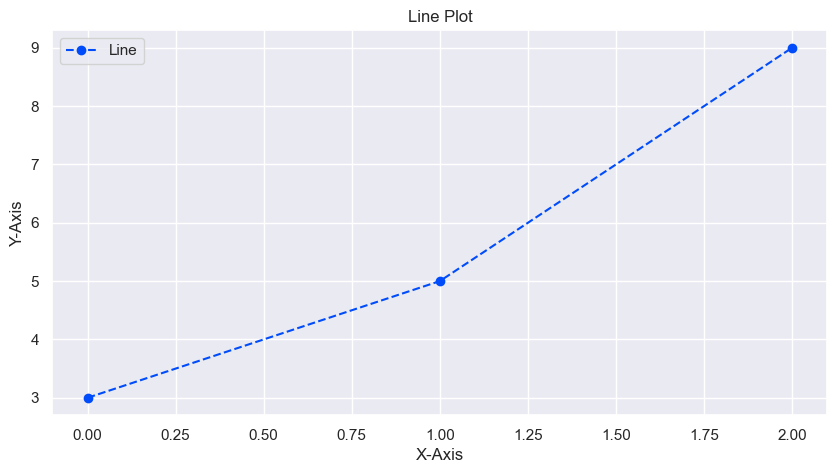

In [926]:
# plot a line passing through (0, 3), (1, 5) & (2, 9).
x = [0, 1, 2]
y = [3, 5, 9]
plt.figure(figsize=(10, 5)) #canvas is created before the chart.
plt.plot(x, y, marker = "o", color='#004CFA', linestyle = "--", label = "Line")
plt.title("Line Plot")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.legend(loc = "best")
plt.grid(True)
plt.show()

In [927]:
moivesPerYr = df["year"].value_counts().head(10)

<Axes: xlabel='year'>

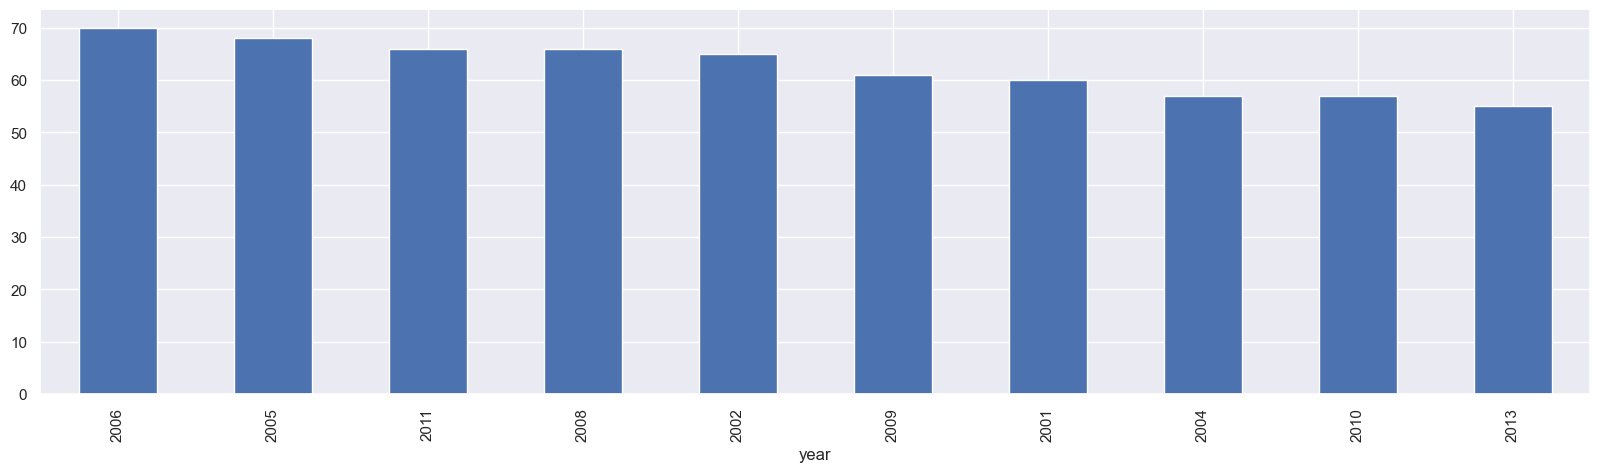

In [928]:
moivesPerYr.plot(kind = "bar")

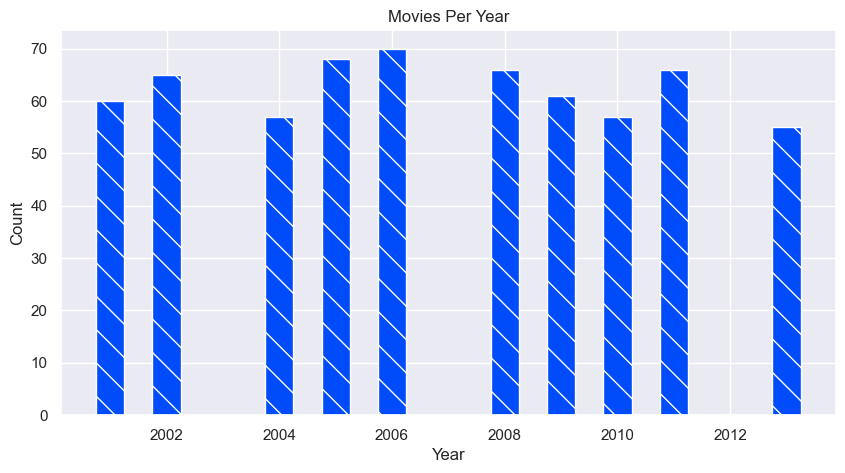

In [929]:
plt.figure(figsize=(10, 5))
plt.bar(moivesPerYr.index, moivesPerYr.values, color = "#004CFA", hatch = "\\", width = 0.5)
plt.grid(True)
plt.title("Movies Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='year', ylabel='count'>

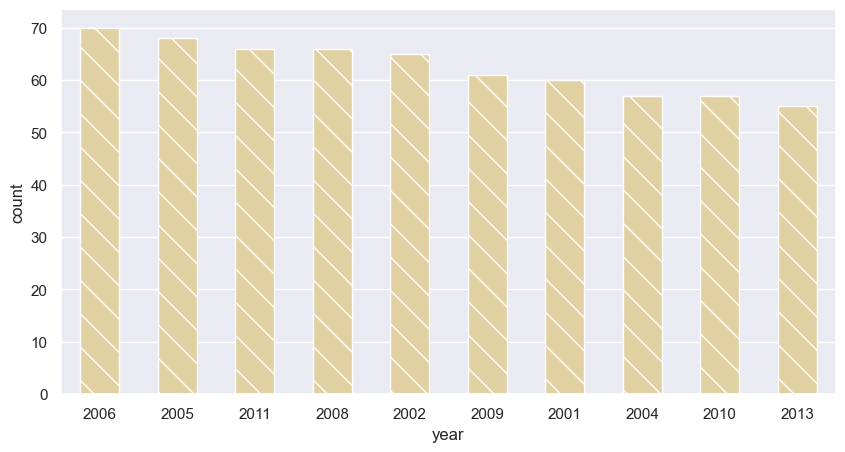

In [930]:
# Seaborn:
# histogram is a plot of the distribution of a dataset. 1 value/ category and its frequency.
# bar plot is a plot of categorical data.

sns.set(rc = {"figure.figsize": (10, 5)})
# sns.countplot(x = "year", data = df, order = df["year"].value_counts().index)
sns.countplot(x = "year", data = df, order = moivesPerYr.index, color = "#EBD698", hatch = "\\", width = 0.5)

<Axes: xlabel='year', ylabel='Count'>

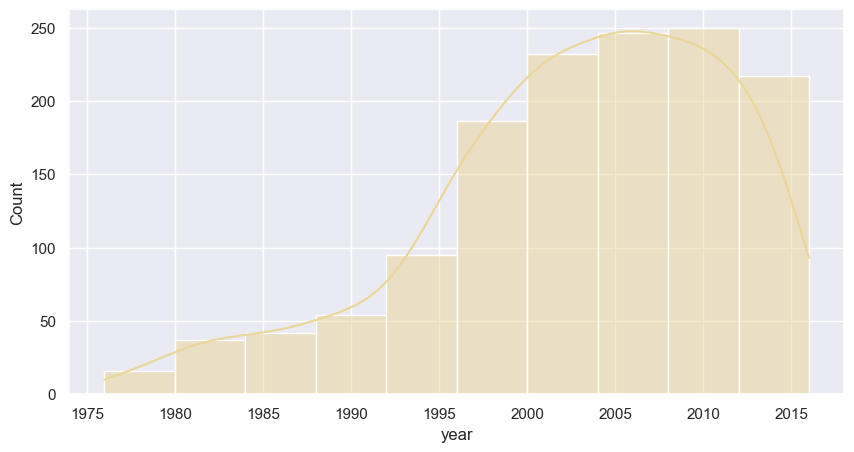

In [931]:
sns.histplot(x = "year", data = df, bins = 10, color = "#EBD698", kde = True)

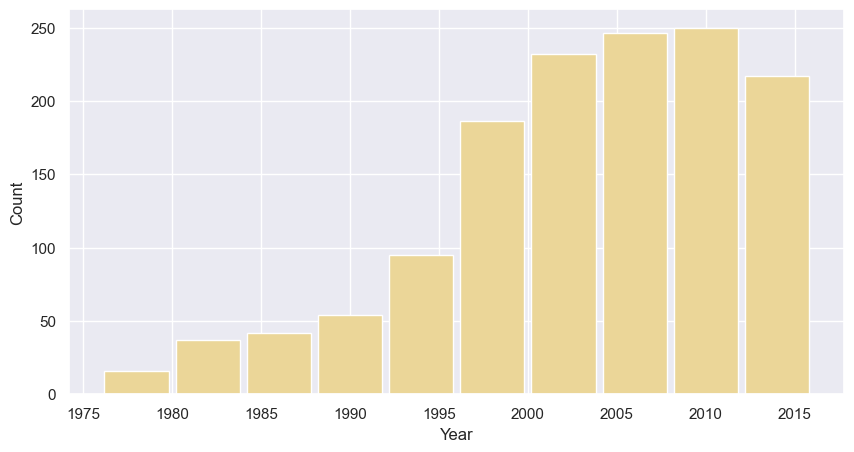

In [932]:
plt.hist(df["year"], bins = 10, color = "#EBD698", rwidth = 0.9)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='year', ylabel='Density'>

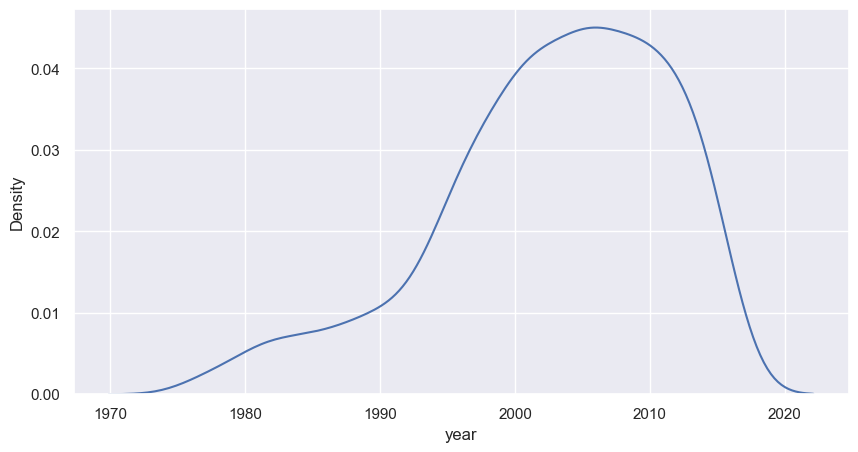

In [933]:
sns.kdeplot(df["year"])

In [934]:
df.describe()

,movie_id,budget,popularity,revenue,vote_average,vote_count,year,profit_margin,prft_mrgn_per
count,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1269.000000
mean,45185.957091,49.430996,32.127273,152.630575,6.388655,1207.090182,2002.750545,103.199578,-72.494564
std,1183.834074,50.351427,35.537162,209.760852,0.806642,1609.400835,8.639953,177.851148,2826.071166
min,43597.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1976.000000,-165.710000,-99900.000000
25%,44184.500000,15.000000,12.000000,25.790000,5.900000,252.000000,1998.000000,0.835000,25.688926
50%,44975.000000,35.000000,24.000000,88.920000,6.400000,632.000000,2004.000000,47.090000,62.552427
75%,45932.500000,70.000000,42.000000,187.430000,7.000000,1476.500000,2009.000000,132.700000,79.002625
max,48395.000000,380.000000,724.000000,2787.970000,8.300000,13752.000000,2016.000000,2550.970000,100.000000


<Axes: xlabel='revenue'>

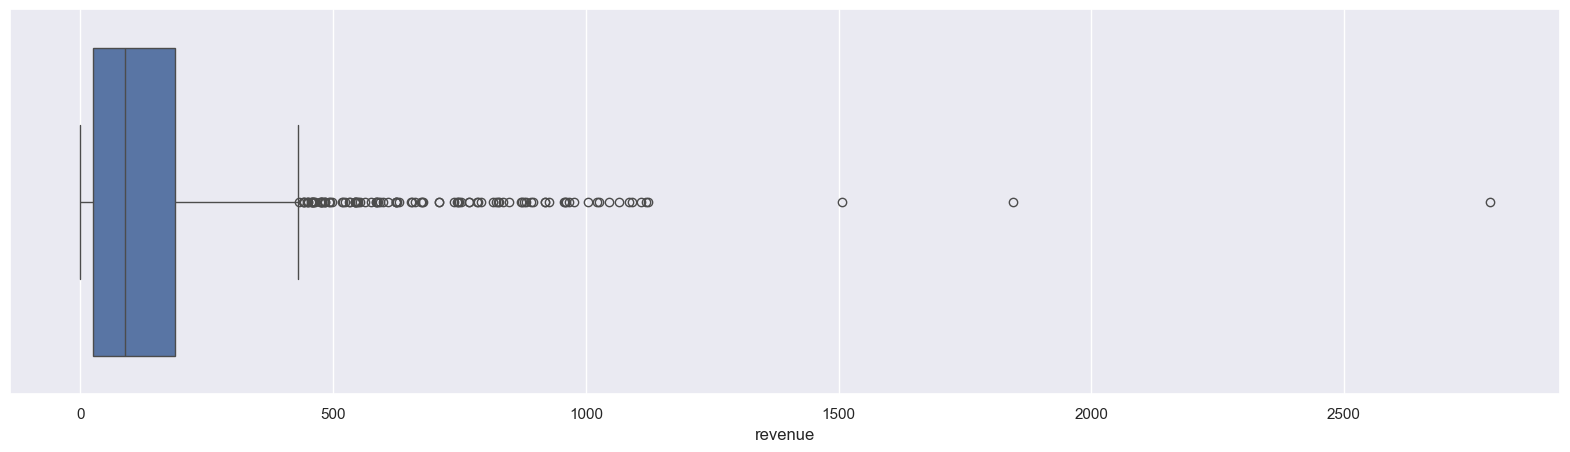

In [935]:
# outliers in seaborn:
sns.set(rc = {"figure.figsize": (20, 5)})
sns.boxplot(x = "revenue", data = df)

In [936]:
# part of stats:
def analyze_outliers(series):
    # 25th - 75th percentile:
    Q1 = series.quantile(0.25)
    Q2 = series.quantile(0.5)
    Q3 = series.quantile(0.75)
    
    IQR = Q3 - Q1 #inter quartile range.
    lb = Q1 - 1.5 * IQR #lower bound
    ub = Q3 + 1.5 * IQR #upper bound
    
    outliers = series[(series < lb) | (series > ub)]

    summary = {
        "25th Percentile" : Q1,
        "50th Percentile" : Q2,
        "75th Percentile" : Q3,
        "Inter Quartile Range" : IQR,
        "Lower Bound" : lb,
        "Upper Bound" : ub,
        "Outlier_Count" : outliers.count(),
        "Outliers" : np.sort(outliers.unique())
    }
    
    return summary

analyze_outliers(pd.Series([6, 2, 3, 4, 5, 1, 50, 47]))

{'25th Percentile': np.float64(2.75),
 '50th Percentile': np.float64(4.5),
 '75th Percentile': np.float64(16.25),
 'Inter Quartile Range': np.float64(13.5),
 'Lower Bound': np.float64(-17.5),
 'Upper Bound': np.float64(36.5),
 'Outlier_Count': np.int64(2),
 'Outliers': array([47, 50])}

In [937]:
df_ouliers_removed = df[df["revenue"] <= analyze_outliers(df["revenue"])["Upper Bound"]]

In [938]:
df_ouliers_removed.describe()

,movie_id,budget,popularity,revenue,vote_average,vote_count,year,profit_margin,prft_mrgn_per
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1167.000000
mean,45287.779262,41.840000,27.353496,106.547698,6.352082,929.101335,2002.490966,64.707698,-85.757423
std,1162.977317,40.010452,24.145278,103.789385,0.804448,1122.483515,8.698485,84.880624,2946.717478
min,43607.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1976.000000,-165.710000,-99900.000000
25%,44321.000000,13.500000,11.000000,22.170000,5.900000,232.000000,1997.000000,0.000000,18.993069
50%,45107.000000,30.000000,22.000000,74.900000,6.400000,546.000000,2004.000000,37.000000,57.961114
75%,46025.000000,60.000000,38.000000,162.000000,6.900000,1205.000000,2009.000000,107.710000,76.790700
max,48395.000000,270.000000,434.000000,429.630000,8.300000,10099.000000,2016.000000,387.800000,100.000000


<Axes: xlabel='budget'>

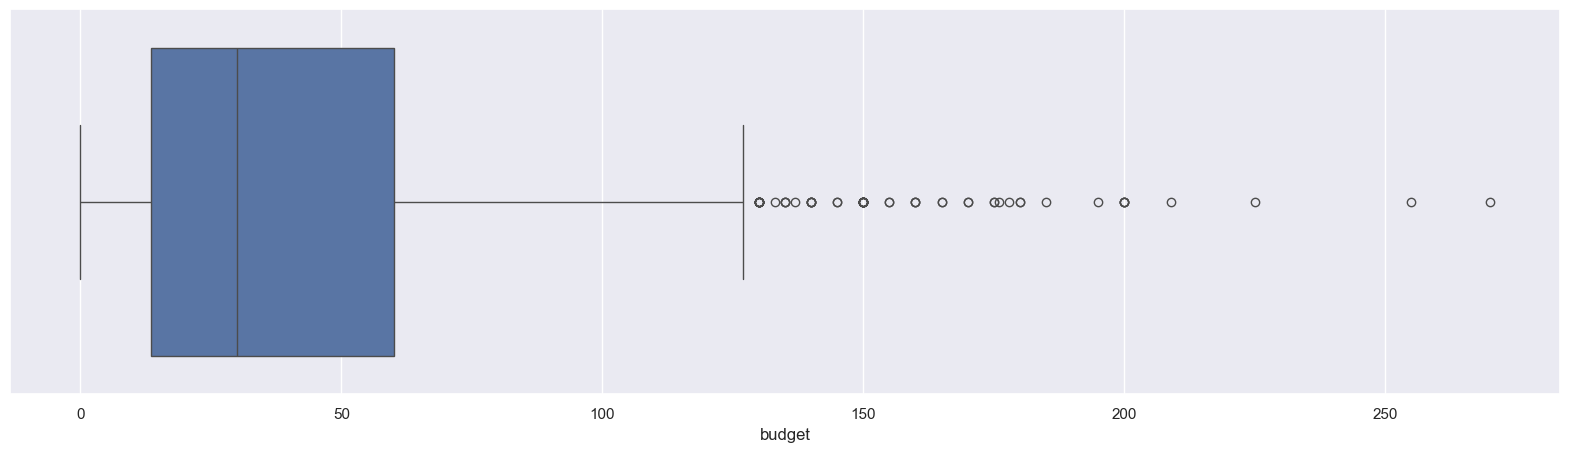

In [939]:
# 30-07-25, Wednesday;

# HW: box plot for budget and vote count:

sns.boxplot(x = "budget", data = df_ouliers_removed)

In [940]:
analyze_outliers(df_ouliers_removed["budget"])

{'25th Percentile': np.float64(13.5),
 '50th Percentile': np.float64(30.0),
 '75th Percentile': np.float64(60.0),
 'Inter Quartile Range': np.float64(46.5),
 'Lower Bound': np.float64(-56.25),
 'Upper Bound': np.float64(129.75),
 'Outlier_Count': np.int64(62),
 'Outliers': array([130., 133., 135., 137., 140., 145., 150., 155., 160., 165., 170.,
        175., 176., 178., 180., 185., 195., 200., 209., 225., 255., 270.])}

<Axes: xlabel='vote_count'>

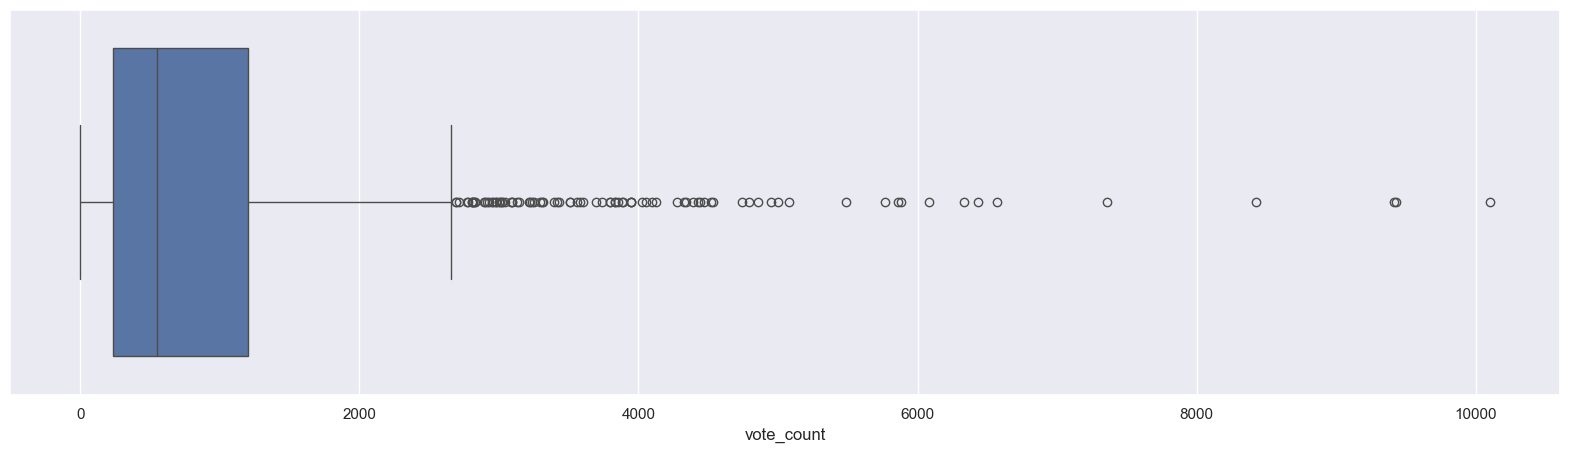

In [941]:
sns.boxplot(x = "vote_count", data = df_ouliers_removed)

In [942]:
analyze_outliers(df_ouliers_removed["vote_count"])

{'25th Percentile': np.float64(232.0),
 '50th Percentile': np.float64(546.0),
 '75th Percentile': np.float64(1205.0),
 'Inter Quartile Range': np.float64(973.0),
 'Lower Bound': np.float64(-1227.5),
 'Upper Bound': np.float64(2664.5),
 'Outlier_Count': np.int64(88),
 'Outliers': array([ 2691,  2692,  2713,  2768,  2781,  2807,  2808,  2811,  2825,
         2827,  2896,  2900,  2912,  2926,  2948,  2954,  2977,  2981,
         3003,  3009,  3021,  3025,  3041,  3086,  3092,  3096,  3128,
         3144,  3218,  3220,  3235,  3254,  3292,  3310,  3313,  3391,
         3417,  3428,  3506,  3509,  3561,  3583,  3601,  3697,  3739,
         3793,  3795,  3829,  3854,  3885,  3886,  3946,  3948,  4028,
         4053,  4097,  4128,  4274,  4329,  4339,  4391,  4430,  4443,
         4470,  4519,  4535,  4742,  4794,  4858,  4949,  4997,  5080,
         5487,  5765,  5862,  5878,  6079,  6336,  6430,  6571,  7359,
         8428,  9413,  9427, 10099])}

In [943]:
# Data cleaning part:
df1 = pd.DataFrame({
    "Full_name": [" Alice Smith ", "bob-jones", "carol white", "DAVID-MILLER", " Eve stone"],
    "birth_date": ["1998-04-12", "2001-11-23", "1995-11-23", "1999-01-30", "2000-03-15"]
})

df1

,Full_name,birth_date
0,Alice Smith,1998-04-12
1,bob-jones,2001-11-23
2,carol white,1995-11-23
3,DAVID-MILLER,1999-01-30
4,Eve stone,2000-03-15


In [944]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Full_name   5 non-null      object
 1   birth_date  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


In [945]:
df1["birth_date"] = pd.to_datetime(df1["birth_date"])
df1

,Full_name,birth_date
0,Alice Smith,1998-04-12
1,bob-jones,2001-11-23
2,carol white,1995-11-23
3,DAVID-MILLER,1999-01-30
4,Eve stone,2000-03-15


In [946]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Full_name   5 non-null      object        
 1   birth_date  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 212.0+ bytes


In [947]:
# cleaning full name:

df1["Full_name"] = df1["Full_name"].str.strip()
df1["Full_name"] = df1["Full_name"].str.replace("-"," ")
df1["Full_name"] = df1["Full_name"].str.title()
df1["First_Name"] = df1["Full_name"].str.split().str[0]
df1["Last_Name"] = df1["Full_name"].str.split().str[1]
df1

,Full_name,birth_date,First_Name,Last_Name
0,Alice Smith,1998-04-12,Alice,Smith
1,Bob Jones,2001-11-23,Bob,Jones
2,Carol White,1995-11-23,Carol,White
3,David Miller,1999-01-30,David,Miller
4,Eve Stone,2000-03-15,Eve,Stone


In [948]:
# Date functions.

df1["year"] = df1["birth_date"].dt.year
df1["month"] = df1["birth_date"].dt.month
df1["day"] = df1["birth_date"].dt.day
df1["name_of_day"] = df1["birth_date"].dt.day_name()
df1

,Full_name,birth_date,First_Name,Last_Name,year,month,day,name_of_day
0,Alice Smith,1998-04-12,Alice,Smith,1998,4,12,Sunday
1,Bob Jones,2001-11-23,Bob,Jones,2001,11,23,Friday
2,Carol White,1995-11-23,Carol,White,1995,11,23,Thursday
3,David Miller,1999-01-30,David,Miller,1999,1,30,Saturday
4,Eve Stone,2000-03-15,Eve,Stone,2000,3,15,Wednesday


In [949]:
# Age:
df1["age_in_2025"] = 2025 - df1["year"]
df1

,Full_name,birth_date,First_Name,Last_Name,year,month,day,name_of_day,age_in_2025
0,Alice Smith,1998-04-12,Alice,Smith,1998,4,12,Sunday,27
1,Bob Jones,2001-11-23,Bob,Jones,2001,11,23,Friday,24
2,Carol White,1995-11-23,Carol,White,1995,11,23,Thursday,30
3,David Miller,1999-01-30,David,Miller,1999,1,30,Saturday,26
4,Eve Stone,2000-03-15,Eve,Stone,2000,3,15,Wednesday,25


In [950]:
df2 = pd.DataFrame({
    "dateTIME": pd.to_datetime(["2025-05-15 8:30:55", "2025-06-16 9:30:55", "2025-07-17 10:30:55", "2025-08-18 11:30:55", "2025-09-19 12:30:55"])
})

df2

,dateTIME
0,2025-05-15 08:30:55
1,2025-06-16 09:30:55
2,2025-07-17 10:30:55
3,2025-08-18 11:30:55
4,2025-09-19 12:30:55


In [951]:
df2["date"] = df2["dateTIME"].dt.date
df2["time"] = df2["dateTIME"].dt.time
df2["hour"] = df2["dateTIME"].dt.hour
df2["minute"] = df2["dateTIME"].dt.minute
df2["second"] = df2["dateTIME"].dt.second
df2

,dateTIME,date,time,hour,minute,second
0,2025-05-15 08:30:55,2025-05-15,08:30:55,8,30,55
1,2025-06-16 09:30:55,2025-06-16,09:30:55,9,30,55
2,2025-07-17 10:30:55,2025-07-17,10:30:55,10,30,55
3,2025-08-18 11:30:55,2025-08-18,11:30:55,11,30,55
4,2025-09-19 12:30:55,2025-09-19,12:30:55,12,30,55


In [952]:
df2["plus_7_days"] = df2["dateTIME"] + pd.Timedelta(days = 7)
df2

,dateTIME,date,time,hour,minute,second,plus_7_days
0,2025-05-15 08:30:55,2025-05-15,08:30:55,8,30,55,2025-05-22 08:30:55
1,2025-06-16 09:30:55,2025-06-16,09:30:55,9,30,55,2025-06-23 09:30:55
2,2025-07-17 10:30:55,2025-07-17,10:30:55,10,30,55,2025-07-24 10:30:55
3,2025-08-18 11:30:55,2025-08-18,11:30:55,11,30,55,2025-08-25 11:30:55
4,2025-09-19 12:30:55,2025-09-19,12:30:55,12,30,55,2025-09-26 12:30:55


In [953]:
df2["date_diff"] = df2["plus_7_days"] - df2["dateTIME"]
df2

,dateTIME,date,time,hour,minute,second,plus_7_days,date_diff
0,2025-05-15 08:30:55,2025-05-15,08:30:55,8,30,55,2025-05-22 08:30:55,7 days
1,2025-06-16 09:30:55,2025-06-16,09:30:55,9,30,55,2025-06-23 09:30:55,7 days
2,2025-07-17 10:30:55,2025-07-17,10:30:55,10,30,55,2025-07-24 10:30:55,7 days
3,2025-08-18 11:30:55,2025-08-18,11:30:55,11,30,55,2025-08-25 11:30:55,7 days
4,2025-09-19 12:30:55,2025-09-19,12:30:55,12,30,55,2025-09-26 12:30:55,7 days


In [955]:
# gen-z and millenials column:
df1["if_gen_z"] = np.where(df1["year"] >= 1997, "Gen-Z", "Millenial")
df1

,Full_name,birth_date,First_Name,Last_Name,year,month,day,name_of_day,age_in_2025,if_gen_z
0,Alice Smith,1998-04-12,Alice,Smith,1998,4,12,Sunday,27,Gen-Z
1,Bob Jones,2001-11-23,Bob,Jones,2001,11,23,Friday,24,Gen-Z
2,Carol White,1995-11-23,Carol,White,1995,11,23,Thursday,30,Millenial
3,David Miller,1999-01-30,David,Miller,1999,1,30,Saturday,26,Gen-Z
4,Eve Stone,2000-03-15,Eve,Stone,2000,3,15,Wednesday,25,Gen-Z
